In [1]:
from adabound import AdaBound
import matplotlib.pyplot as plt
import numpy as np

In [12]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms

# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
if torch.cuda.is_available():
    print('cuda')

# Hyper-parameters 
input_size = 784
hidden_size = 500
num_classes = 10
num_epochs = 200
batch_size = 100
#Train_accuracies = []
#Test_accuracies = []

# MNIST dataset 
train_dataset = torchvision.datasets.MNIST(root='../../data', 
                                           train=True, 
                                           transform=transforms.ToTensor(),  
                                           download=True)

test_dataset = torchvision.datasets.MNIST(root='../../data', 
                                          train=False, 
                                          transform=transforms.ToTensor())

# Data loader
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False)

# Fully connected neural network with one hidden layer
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size) 
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, num_classes)  
    
    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out

model = NeuralNet(input_size, hidden_size, num_classes).to(device)

In [ ]:
# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
#optimizer = torch.optim.SGD(model.parameters(), lr = 0.1, momentum=0.9)
#optimizer = AdaBound(model.parameters(), lr=1e-3, final_lr=0.1)


# Train the model
total_step = len(train_loader)
train_accuracies = []
test_accuracies = []
for epoch in range(num_epochs):
    train_loss = 0
    correct = 0
    total = 0
    for i, (images, labels) in enumerate(train_loader): 
        # Move tensors to the configured device
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        
        # Forward pass
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        # Backward and optimize
        loss.backward()
        optimizer.step()
        
        train_loss += loss.item()
        _, predicted = outputs.max(1)
        total += labels.size(0)
        correct += predicted.eq(labels).sum().item()
                
        if (i+1) % 600 == 0:
            train_acc = 100. * correct / total
            print('Epoch [{}/{}], Train Accuracy:{:.3f}%'.format(
                epoch+1, num_epochs, train_acc))
            train_accuracies.append(train_acc)
                # Test the model
                # In test phase, we don't need to compute gradients (for memory efficiency)
            with torch.no_grad():
                correcttest = 0
                totaltest = 0
                for j, (images, labels) in enumerate(test_loader):
                    images = images.reshape(-1, 28*28).to(device)
                    labels = labels.to(device)
                    outputs = model(images)
                    _, predicted = torch.max(outputs.data, 1)
                    totaltest += labels.size(0)
                    correcttest += (predicted == labels).sum().item()
                    test_acc = 100. * correcttest / totaltest
                print('Test Accuracy: {:.3f} %'.format(test_acc))
                test_accuracies.append(test_acc)

# Save the model checkpoint
torch.save(model.state_dict(), 'model.ckpt')

Epoch [1/200], Train Accuracy:91.635%
Test Accuracy: 95.760 %
Epoch [2/200], Train Accuracy:96.517%
Test Accuracy: 97.260 %
Epoch [3/200], Train Accuracy:97.805%
Test Accuracy: 97.500 %
Epoch [4/200], Train Accuracy:98.375%
Test Accuracy: 97.720 %
Epoch [5/200], Train Accuracy:98.760%
Test Accuracy: 97.630 %
Epoch [6/200], Train Accuracy:99.140%
Test Accuracy: 97.970 %
Epoch [7/200], Train Accuracy:99.292%
Test Accuracy: 97.960 %
Epoch [8/200], Train Accuracy:99.490%
Test Accuracy: 97.950 %
Epoch [9/200], Train Accuracy:99.610%
Test Accuracy: 97.760 %
Epoch [10/200], Train Accuracy:99.740%
Test Accuracy: 97.970 %
Epoch [11/200], Train Accuracy:99.820%
Test Accuracy: 97.690 %
Epoch [12/200], Train Accuracy:99.817%
Test Accuracy: 98.120 %
Epoch [13/200], Train Accuracy:99.838%
Test Accuracy: 98.040 %
Epoch [14/200], Train Accuracy:99.802%
Test Accuracy: 98.100 %
Epoch [15/200], Train Accuracy:99.835%
Test Accuracy: 98.190 %
Epoch [16/200], Train Accuracy:99.815%
Test Accuracy: 98.220 %
E

In [4]:
Train_accuracies = np.array([train_accuracies])
Test_accuracies = np.array([test_accuracies])

In [10]:
Train_accuracies = np.concatenate((Train_accuracies,np.array([train_accuracies])))
Test_accuracies = np.concatenate((Test_accuracies,np.array([test_accuracies])))

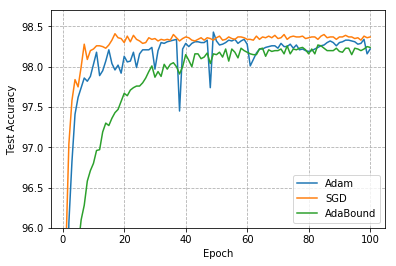

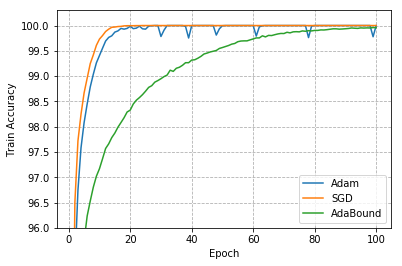

In [11]:
fig1=plt.figure()
plt.xlabel('Epoch')
plt.ylabel('Test Accuracy')
plt.ylim(96, 98.7)
    
for y_arr, label in zip(Test_accuracies,['Adam', 'SGD', 'AdaBound']):
    linestyle = '--' if 'Bound' in label else '-'
    plt.plot(range(1,101), y_arr, label=label)
        
plt.grid(ls='--')
plt.legend(loc = 'lower right')
plt.show()
#fig1.savefig('/Users/achlys_shaw/AdaBounddemos/mnist/curve/'+'test_lr=1e-3_flr=01_mom=09.png')

fig2 = plt.figure()
plt.xlabel('Epoch')
plt.ylabel('Train Accuracy')
plt.ylim(96, 100.3)
    
for y_arr, label in zip(Train_accuracies,['Adam', 'SGD', 'AdaBound']):
    linestyle = '--' if 'Bound' in label else '-'
    plt.plot(range(1,101), y_arr, label=label)
    
plt.grid(ls='--')
plt.legend(loc = 'lower right')
plt.show()
#fig2.savefig('/Users/achlys_shaw/AdaBounddemos/mnist/curve/'+'train_lr=1e-3_flr=01_mom=09.png')